In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid')


In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Cleaning Data

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
# df['rate'] = df['rate'].astype('str')

In [9]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df[df['rate']=='NEW']['reviews_list']

72       [('Rated 4.0', 'RATED\n  cost for chicken roll...
75                                                      []
110      [('Rated 1.0', 'RATED\n  I have been here many...
130                                                     []
131                                                     []
                               ...                        
51585                                                   []
51586    [('Rated 5.0', 'RATED\n  This is an awesome pl...
51603    [('Rated 3.0', 'RATED\n  A highly expensive pl...
51604    [('Rated 3.0', 'RATED\n  Biriyani had ordered ...
51605                                                   []
Name: reviews_list, Length: 2208, dtype: object

In [12]:
# df['reviews_list'].value_counts()

In [13]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [15]:
df[df['name'] == 'Cafe Coffee Day']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
22,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
254,https://www.zomato.com/bangalore/cafe-coffee-d...,"28th Main, 8th Block, Jayanagar, Bangalore",Cafe Coffee Day,Yes,No,3.2/5,17,+91 9071381447,Jayanagar,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 5.0', 'RATED\n Delicious mouthwateri...",[],Delivery,Banashankari
625,https://www.zomato.com/bangalore/cafe-coffee-d...,"21st Main Road, Next to Deva Gowda Petrol Pump...",Cafe Coffee Day,No,No,NaN,0,+91 7483258004,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n Had ordered devil?s o...",[],Dine-out,Banashankari
889,https://www.zomato.com/bangalore/cafe-coffee-d...,"Gopalan Innovation Mall, Bannerghatta Road, Ba...",Cafe Coffee Day,No,No,3.6/5,19,+91 9071381530,Bannerghatta Road,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', ""RATED\n It is Okay place. Thi...",[],Cafes,Bannerghatta Road
1186,https://www.zomato.com/bangalore/cafe-coffee-d...,"524, 60 Feet Road,Vijaya Bank Layout, Opposite...",Cafe Coffee Day,Yes,No,3.7/5,26,+91 9342303654,Bannerghatta Road,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 3.0', 'RATED\n What can someone writ...","[""Roasted Chicken 'n' Cheese Multigrain"", 'Dut...",Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,https://www.zomato.com/bangalore/cafe-coffee-d...,"1570, Vinutha Tower, HSR Layout, Sector 1, Hos...",Cafe Coffee Day,Yes,No,3.1 /5,13,080 64550114,Sarjapur Road,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n Bestest place for all...","['Tandoori Chicken Multigrain', 'Garlic Bread'...",Dine-out,Sarjapur Road
50119,https://www.zomato.com/bangalore/cafe-coffee-d...,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,Yes,No,3.6 /5,45,+91 9071718669,Whitefield,Cafe,"Sandwiches, Brownie",Cafe,650,"[('Rated 3.0', 'RATED\n Ordered a couple of W...",[],Cafes,Whitefield
50282,https://www.zomato.com/bangalore/cafe-coffee-d...,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,Yes,No,3.6 /5,45,+91 9071718669,Whitefield,Cafe,"Sandwiches, Brownie",Cafe,650,"[('Rated 3.0', 'RATED\n Ordered a couple of W...","['Cafe Frappe', 'Tropical Iceberg', 'Crunchy F...",Delivery,Whitefield
51004,https://www.zomato.com/bangalore/cafe-coffee-d...,"186/26, Ground Floor, Badavala Nagar, B Naraya...",Cafe Coffee Day,No,No,NaN,0,NaN,Whitefield,Cafe,NaN,"Cafe, Fast Food",900,[],[],Desserts,Whitefield


In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df[df['rate'].isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,[],[],Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,NaN,South Indian,200,[],[],Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,NaN,0,+91 9591504624,Banashankari,"Takeaway, Delivery",NaN,Beverages,250,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400,[],[],Dine-out,Whitefield
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield


In [18]:
df[df['rate']=='NEW'].shape

(2208, 17)

In [19]:
df['rate'] = df['rate'].fillna('?')

In [20]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '?', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
def generate_rate (rate) : 
    if rate == 'NEW' : 
        return '?'
    else : 
        return rate

In [22]:
df['New_Rate'] = df['rate'].apply(generate_rate)

In [23]:
df[df['New_Rate']=='?'].shape

(9983, 18)

In [24]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1/5
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1/5
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8/5
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7/5
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8/5


In [25]:
df['New_Rate'][0].split('/')[0]

'4.1'

In [26]:
def split_rate (rate) : 
    if '/' in rate : 
        return rate.split('/')[0]
    else : 
        return rate

In [27]:
split_rate('4.1/5')

'4.1'

In [28]:
df['New_Rate'] = df['New_Rate'].apply(split_rate)

In [29]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [30]:
df['New_Rate'].value_counts()

?       9983
3.9     2098
3.8     2022
3.7     2011
3.9     1874
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: New_Rate, Length: 64, dtype: int64

In [31]:
df[(df['New_Rate']=='?') & (df['reviews_list']!='[]')]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,?
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,?,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,?
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,?,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,?
110,https://www.zomato.com/bangalore/hari-super-sa...,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari,?
114,https://www.zomato.com/bangalore/cake-bite-ban...,"Near Seetha Circle, Vivekananda Park Road, Gir...",Cake Bite,No,No,?,0,+91 8277102303,Banashankari,Bakery,NaN,Bakery,300,"[('Rated 1.0', ""RATED\n worst service & only ...",[],Delivery,Banashankari,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51603,https://www.zomato.com/bangalore/shiv-sagar-1-...,"Shop No 10, Food Court, 2nd Floor, Phoenix Mar...",Shiv sagar,Yes,No,NEW,0,+91 9513300048\n+91 8067266097,Whitefield,"Quick Bites, Food Court",NaN,"South Indian, Chinese, North Indian",250,"[('Rated 3.0', 'RATED\n A highly expensive pl...","['Malai Paneer Tikka', 'Paneer Kofta', 'Mushro...",Dine-out,Whitefield,?
51604,https://www.zomato.com/bangalore/nawab-di-biry...,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,No,No,NEW,0,+91 7899298400\n+91 9818654628,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],Dine-out,Whitefield,?
51626,https://www.zomato.com/bangalore/ghar-ke-phulk...,"Plot 107, Praveen Transport Complex, Near ITPL...",Ghar Ke Phulke,No,No,?,0,+91 9555784875,"ITPL Main Road, Whitefield",Quick Bites,NaN,North Indian,300,"[('Rated 5.0', 'RATED\n Awesome food, amazing...",[],Dine-out,Whitefield,?
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,?,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,?


In [32]:
df[(df['New_Rate']=='?') & (df['reviews_list']!='[]')]['reviews_list'][90]

'[(\'Rated 1.0\', \'RATED\\n  Do not order anything. This restaurant is so irresponsible they do not even answer calls. I had ordered cake for my daughter birthday via zomato at 11:54am however it was confirmed that the order will be delivered before 3:00pm same day. However, zomato does not know what to do and they say restaurant is not receiving our calls.\'), (\'Rated 1.0\', "RATED\\n  My order never reached me and the delivery boy\'s number was never sent. The guy who was coordinating with the order told me that I\'d receive my order in a while and stopped receiving my calls soon. Really disappointed and dissatisfied after waiting for so long for a birthday cake to come and be disappointed and disappoint others on someone\'s birthday. Really bad service. I wish I could rate a 0 for this place cause I didn\'t even get a chance to be positive and appreciate them for something atleast.")]'

In [33]:
df[(df['New_Rate']=='?') & (df['reviews_list']!='[]')]['reviews_list'][90].split(',')[0].split('Rated ')[1][0]

'1'

In [34]:
def getRatefromReview (rate , review) : 
    if rate == '?' and review != '[]' : 
        return review.split(',')[0].split('Rated ')[1][0] 
    else :
        return rate 

In [35]:
getRatefromReview('?','(\'Rated 1.0\', \'RATED\\n  Do not order anything')

'1'

In [36]:
df['New_Rate'] = df.apply(lambda x : getRatefromReview(x.New_Rate , x.reviews_list) , axis = 1)

In [37]:
def getRatefromReview2 (rate , review) : 
    if rate == '-' and review != '[]' : 
        return review.split(',')[0].split('Rated ')[1][0] 
    else :
        return rate 

In [38]:
df['New_Rate'] = df.apply(lambda x : getRatefromReview2(x.New_Rate , x.reviews_list) , axis = 1)

In [39]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [40]:
df['New_Rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '4', '2.9', '?', '3.5',
       '1', '2.6', '3.8 ', '3.4', '5', '4.5', '2.5', '3', '2.7', '4.7',
       '2', '2.4', '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ',
       '4.2 ', '4.0 ', '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ',
       '3.5 ', '2.7 ', '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ',
       '4.9', '2.1', '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ',
       '4.7 ', '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [41]:
df[df['New_Rate']=='-']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
3068,https://www.zomato.com/bangalore/house-of-tast...,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,No,No,-,0,+91 9538004054,Wilson Garden,Quick Bites,NaN,North Indian,400,[],[],Delivery,Basavanagudi,-
3373,https://www.zomato.com/bangalore/right-pizza-b...,"Shop 9, East Anjanaiya Temple Street, Gandhi B...",Right Pizza,Yes,No,-,0,+91 9980473473\n+91 9845338098,Basavanagudi,Quick Bites,NaN,Pizza,300,[],[],Dine-out,Basavanagudi,-
3387,https://www.zomato.com/bangalore/mota-bawarchi...,"19/A H. Siddhaiah Road, Sudhama Nagar, Opposit...",Mota Bawarchi,No,No,-,0,+91 9380109284,Basavanagudi,Quick Bites,NaN,"North Indian, Biryani, Fast Food",300,[],[],Dine-out,Basavanagudi,-
3397,https://www.zomato.com/bangalore/arya-vysya-re...,"12/1, Food Street, Old Market Road, V.V.Puram,...",Arya Vysya Refreshment,No,No,-,0,080 26614521\n+91 9901903396,Basavanagudi,Quick Bites,NaN,South Indian,100,[],[],Dine-out,Basavanagudi,-
3398,https://www.zomato.com/bangalore/victoria-term...,"15, South End Road, Basavanagudi, Bangalore",Victoria Terminus,No,No,-,0,080 65555612,Basavanagudi,Quick Bites,NaN,"Fast Food, Maharashtrian",250,[],[],Dine-out,Basavanagudi,-
3408,https://www.zomato.com/bangalore/idly-mane-bas...,"11/1 & 11/5 Food Street, Old Market Road, V.V....",Idly Mane,No,No,-,0,+91 9916994813\n+91 9513063623,Basavanagudi,Quick Bites,NaN,"South Indian, Street Food",200,[],[],Dine-out,Basavanagudi,-
3430,https://www.zomato.com/bangalore/swathi-upahar...,"265, 1st Main Road, Near DTDC & Chamrajpet Pol...",Swathi Upahara,No,No,-,0,+91 8970792489,Basavanagudi,Quick Bites,NaN,"Biryani, Kebab, Chinese",350,[],[],Dine-out,Basavanagudi,-
3432,https://www.zomato.com/bangalore/pailwan-house...,"3, First Floor, Opposite Bangalore Hospital, R...",Pailwan House,No,No,-,0,+91 9844753514,Basavanagudi,Quick Bites,NaN,"Fast Food, Biryani",350,[],[],Dine-out,Basavanagudi,-
3433,https://www.zomato.com/bangalore/mama-mys-cafe...,"Shop 3, Suprabha Complex, Sri Vasavi Temple Ro...",Mama Mys Cafe,No,No,-,0,+91 8088112115,Basavanagudi,Quick Bites,NaN,Fast Food,300,[],[],Dine-out,Basavanagudi,-
3434,https://www.zomato.com/bangalore/sticke2waffle...,"27/1, East Anjaneya Temple street, Basavanagud...",Sticke2Waffles,No,No,-,0,+91 9663090484,Basavanagudi,Dessert Parlor,NaN,"Desserts, Ice Cream",100,[],[],Dine-out,Basavanagudi,-


In [42]:
df[df['New_Rate']=='?']['name'].value_counts()

Momo Time                                                  30
Ambur Biryani                                              24
Shiv Sagar                                                 24
Chillout                                                   23
Sethi's                                                    23
                                                           ..
Tastydabba.in                                               1
Shy Chef                                                    1
Sandy Cool Joint                                            1
Kuch Acha Khate Hain- Love for Food                         1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 1920, dtype: int64

In [43]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [44]:
df.drop(df[(df['New_Rate'] == '?') | (df['New_Rate'] == '-') ].index , axis = 0 , inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [45]:
df[df['New_Rate']=='-']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45243 entries, 0 to 45242
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          45243 non-null  object
 1   address                      45243 non-null  object
 2   name                         45243 non-null  object
 3   online_order                 45243 non-null  object
 4   book_table                   45243 non-null  object
 5   rate                         45243 non-null  object
 6   votes                        45243 non-null  int64 
 7   phone                        44271 non-null  object
 8   location                     45243 non-null  object
 9   rest_type                    45083 non-null  object
 10  dish_liked                   23632 non-null  object
 11  cuisines                     45226 non-null  object
 12  approx_cost(for two people)  44945 non-null  object
 13  reviews_list                 45

In [47]:
def convert_rate_to_int (rate) : 
    if ('.') in rate : 
        if int(rate.split('.')[1]) >= 5 : 
            return int(rate.split('.')[0]) +1 
        else :
            return int(rate.split('.')[0])
    else :
        return int(rate) 
            

In [48]:
convert_rate_to_int('3.8')

4

In [49]:
df['New_Rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '4', '2.9', '3.5', '1',
       '2.6', '3.8 ', '3.4', '5', '4.5', '2.5', '3', '2.7', '4.7', '2',
       '2.4', '2.2', '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [50]:
df[df['New_Rate']=='-']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate


In [51]:
df['New_Rate'] = df['New_Rate'].apply(convert_rate_to_int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45243 entries, 0 to 45242
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          45243 non-null  object
 1   address                      45243 non-null  object
 2   name                         45243 non-null  object
 3   online_order                 45243 non-null  object
 4   book_table                   45243 non-null  object
 5   rate                         45243 non-null  object
 6   votes                        45243 non-null  int64 
 7   phone                        44271 non-null  object
 8   location                     45243 non-null  object
 9   rest_type                    45083 non-null  object
 10  dish_liked                   23632 non-null  object
 11  cuisines                     45226 non-null  object
 12  approx_cost(for two people)  44945 non-null  object
 13  reviews_list                 45

In [53]:
df.shape

(45243, 18)

In [54]:
df['New_Rate'].value_counts()

4    29631
3    11896
5     2636
1      718
2      362
Name: New_Rate, dtype: int64

In [55]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4


In [56]:
df['votes'].value_counts()

0       3569
4       1133
6        989
7        872
9        738
        ... 
3673       1
1862       1
3909       1
2155       1
843        1
Name: votes, Length: 2328, dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            972
location                           0
rest_type                        160
dish_liked                     21611
cuisines                          17
approx_cost(for two people)      298
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Rate                           0
dtype: int64

In [59]:
df.dropna(subset=['rest_type'], inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [60]:
df[df['rest_type'].isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate


In [61]:
df[df['approx_cost(for two people)'].isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
1571,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,?,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road,1
2695,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi,1
3301,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur,4
3476,https://www.zomato.com/bangalore/north-indian-...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",North Indian Kitchen,No,No,3.2/5,13,NaN,HSR,Takeaway,NaN,North Indian,NaN,"[('Rated 1.0', 'RATED\n Ordered green puri an...",[],Delivery,Bellandur,3
3556,https://www.zomato.com/bangalore/only-parathas...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",Only Parathas,No,No,3.3/5,6,NaN,HSR,"Takeaway, Delivery",NaN,North Indian,NaN,"[('Rated 1.0', 'RATED\n A bit too spicy, and ...",[],Delivery,Bellandur,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44425,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield,4
44688,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,?,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield,4
44700,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield,3
44720,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield,3


In [62]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4


In [63]:
df.dropna(subset=['approx_cost(for two people)'], inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [64]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            683
location                           0
rest_type                          0
dish_liked                     21359
cuisines                          13
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Rate                           0
dtype: int64

In [65]:
df.dropna(subset=['cuisines'], inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [66]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            682
location                           0
rest_type                          0
dish_liked                     21346
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Rate                           0
dtype: int64

# Treating with data 

In [67]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4


In [68]:
df['address'].unique()

array(['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore',
       '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore',
       '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore',
       ...,
       'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka',
       '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore',
       '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore'],
      dtype=object)

In [69]:
df['address'].value_counts()

Delivery Only                                                                                                                 101
14th Main, 4th Sector, HSR, Bangalore                                                                                          62
The Ritz-Carlton, 99, Residency Road, Bangalore                                                                                61
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                                                           49
710, Thubarahalli, Varthur Main Road, Whitefield, Bangalore                                                                    43
                                                                                                                             ... 
Behind JP Morgan Bus Stop, 3rd Cross, Marathahalli, Bangalore                                                                   1
10, Near Karnataka Bank, Kaggadaspura Main Road, Kaggadasapura, Bangalore                 

In [70]:
df[df['address']=='Delivery Only']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate
1232,https://www.zomato.com/bangalore/dilli-bannerg...,Delivery Only,Dilli ??,Yes,No,?,0,+91 9108707005\r\n+91 9886144476,South Bangalore,Delivery,NaN,North Indian,500,"[('Rated 5.0', 'RATED\n Loved the food, very ...",[],Delivery,Bannerghatta Road,5
1382,https://www.zomato.com/bangalore/fritz-haber-b...,Delivery Only,Fritz Haber,Yes,No,3.4/5,4,+91 8095066833,South Bangalore,Delivery,NaN,"Ice Cream, Desserts",450,[],[],Delivery,Bannerghatta Road,3
1472,https://www.zomato.com/jiyo-natural?context=ey...,Delivery Only,Jiyo Natural,No,No,3.6/5,14,+91 9686312345,South Bangalore,Delivery,NaN,"Healthy Food, North Indian",300,"[('Rated 5.0', 'RATED\n Really good food both...",[],Delivery,Bannerghatta Road,4
3395,https://www.zomato.com/bangalore/costa-biryani...,Delivery Only,Costa Biryanis,Yes,No,3.3/5,10,+91 9900733330,East Bangalore,Delivery,NaN,"Andhra, Biryani, North Indian, South Indian",300,"[('Rated 1.0', 'RATED\n I received mutton ins...",[],Delivery,Bellandur,3
3556,https://www.zomato.com/supreme-biriyani-3?cont...,Delivery Only,Supreme Biryani,Yes,No,3.3/5,18,+91 9538103747,South Bangalore,Delivery,NaN,Biryani,400,"[('Rated 5.0', 'RATED\n good div'), ('Rated 5...",[],Delivery,Bellandur,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42598,https://www.zomato.com/bangalore/hyderabad-bir...,Delivery Only,Hyderabad Biryaani Home,Yes,No,3.0 /5,137,+91 9742017972,South Bangalore,Takeaway,"Chicken, Hyderabadi Biryani, Mutton Biryani","North Indian, Hyderabadi, Chinese",650,"[('Rated 1.0', 'RATED\n Very bad taste'), ('R...",[],Delivery,Sarjapur Road,3
42718,https://www.zomato.com/supreme-biriyani-3?cont...,Delivery Only,Supreme Biryani,Yes,No,3.3 /5,18,+91 9538103747,South Bangalore,Delivery,NaN,Biryani,500,"[('Rated 5.0', 'RATED\n good div'), ('Rated 5...",[],Delivery,Sarjapur Road,3
42923,https://www.zomato.com/jiyo-natural?context=ey...,Delivery Only,Jiyo Natural,No,No,3.6 /5,15,+91 9686312345,South Bangalore,Delivery,NaN,"Healthy Food, North Indian",300,"[('Rated 4.0', 'RATED\n Being a Foodie, choos...",[],Delivery,Sarjapur Road,4
43572,https://www.zomato.com/bangalore/supreme-birya...,Delivery Only,Supreme Biryani,Yes,No,?,0,+91 9606441696,East Bangalore,"Takeaway, Delivery",NaN,Biryani,500,"[('Rated 4.0', 'RATED\n The chicken biryani a...",[],Delivery,Whitefield,4


In [71]:
df.shape

(44774, 18)

In [72]:
df['listed_in(city)'].value_counts()

BTM                      2842
Koramangala 7th Block    2541
Koramangala 5th Block    2449
Koramangala 4th Block    2436
Koramangala 6th Block    2288
Jayanagar                2079
JP Nagar                 1800
Indiranagar              1653
Church Street            1626
MG Road                  1615
Brigade Road             1582
Lavelle Road             1539
HSR                      1483
Residency Road           1433
Marathahalli             1412
Bannerghatta Road        1359
Whitefield               1339
Brookefield              1265
Old Airport Road         1258
Basavanagudi             1135
Kammanahalli             1124
Kalyan Nagar             1103
Sarjapur Road            1090
Bellandur                1047
Frazer Town              1039
Malleshwaram              989
Electronic City           936
Rajajinagar               933
Banashankari              774
New BEL Road              605
Name: listed_in(city), dtype: int64

In [73]:
df['location'].value_counts()

BTM                      4289
Koramangala 5th Block    2394
HSR                      2203
JP Nagar                 1896
Indiranagar              1894
                         ... 
West Bangalore              6
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [74]:
def Adresses (address) :
    address=address.lower()
    if 'bagalur' in address or 'btm' in address or 'koramangala' in address : 
        return "Most Population"
    elif 'hesaraghatta Grass Farm' in address : 
        return 'Small Population'
    elif 'hotel' in address : 
        return 'Hotels Place'
    elif 'delivery' in address : 
        return 'Delivery Only'
    elif 'main' in address or 'capital' in address or 'park' in address or 'centre'in address : 
        return 'good place'
    else : 
        return 'normal place'

In [75]:
Adresses('2E2, 4th Cross Road, BAGALUR Devasandra Industrial Est...')

'Most Population'

In [76]:
df['PLACE_TYPE'] = df['address'].apply(Adresses)

In [77]:
df['PLACE_TYPE'].value_counts()

normal place       21684
Most Population    10949
good place         10944
Hotels Place        1096
Delivery Only        101
Name: PLACE_TYPE, dtype: int64

In [78]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE
44769,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,?,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,4,normal place
44770,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,3,good place
44771,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,4,good place
44772,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4,Hotels Place
44773,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,3,good place


In [79]:
df['address'].value_counts()

Delivery Only                                                                                                                 101
14th Main, 4th Sector, HSR, Bangalore                                                                                          62
The Ritz-Carlton, 99, Residency Road, Bangalore                                                                                61
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                                                           49
710, Thubarahalli, Varthur Main Road, Whitefield, Bangalore                                                                    43
                                                                                                                             ... 
Behind JP Morgan Bus Stop, 3rd Cross, Marathahalli, Bangalore                                                                   1
10, Near Karnataka Bank, Kaggadaspura Main Road, Kaggadasapura, Bangalore                 

In [80]:
df['address'][44771]

'Four Points by Sheraton Bengaluru, 43/3, Whitefield Main Road, Whitefield, Bangalore'

In [81]:
df['address'][44771].split(',')[-1]

' Bangalore'

In [82]:
df['City'] = df['address'].apply(lambda x : x.split(',')[-1])

In [83]:
# set(df['address'].unique().tolist())

In [84]:
df['address'][1]

'2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'

In [85]:
df['location'].value_counts()

BTM                      4289
Koramangala 5th Block    2394
HSR                      2203
JP Nagar                 1896
Indiranagar              1894
                         ... 
West Bangalore              6
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [86]:
df['listed_in(city)'].value_counts()

BTM                      2842
Koramangala 7th Block    2541
Koramangala 5th Block    2449
Koramangala 4th Block    2436
Koramangala 6th Block    2288
Jayanagar                2079
JP Nagar                 1800
Indiranagar              1653
Church Street            1626
MG Road                  1615
Brigade Road             1582
Lavelle Road             1539
HSR                      1483
Residency Road           1433
Marathahalli             1412
Bannerghatta Road        1359
Whitefield               1339
Brookefield              1265
Old Airport Road         1258
Basavanagudi             1135
Kammanahalli             1124
Kalyan Nagar             1103
Sarjapur Road            1090
Bellandur                1047
Frazer Town              1039
Malleshwaram              989
Electronic City           936
Rajajinagar               933
Banashankari              774
New BEL Road              605
Name: listed_in(city), dtype: int64

In [87]:
df['listed_in(city)'] = df['listed_in(city)'].replace('BTM' , 'BTM Layout')

In [88]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Church Street' , 'church street bangalore')

In [89]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Old Airport Road' , 'old airport road bangalore')

In [90]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Whitefield' , 'whitefield bangalore')

In [91]:
df['listed_in(city)'] = df['listed_in(city)'].replace('HSR' , 'hsr bangalore')

In [92]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Jayanagar' , 'jayanagar bangalore')

In [93]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Brookefield' , 'brookefield bangalore')

In [94]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Lavelle Road' , 'lavelle road bangalore')

In [95]:
df['listed_in(city)'] = df['listed_in(city)'].replace('Residency Road' , 'residency road bangalore')

In [96]:
df['listed_in(city)'].value_counts()

BTM Layout                    2842
Koramangala 7th Block         2541
Koramangala 5th Block         2449
Koramangala 4th Block         2436
Koramangala 6th Block         2288
jayanagar bangalore           2079
JP Nagar                      1800
Indiranagar                   1653
church street bangalore       1626
MG Road                       1615
Brigade Road                  1582
lavelle road bangalore        1539
hsr bangalore                 1483
residency road bangalore      1433
Marathahalli                  1412
Bannerghatta Road             1359
whitefield bangalore          1339
brookefield bangalore         1265
old airport road bangalore    1258
Basavanagudi                  1135
Kammanahalli                  1124
Kalyan Nagar                  1103
Sarjapur Road                 1090
Bellandur                     1047
Frazer Town                   1039
Malleshwaram                   989
Electronic City                936
Rajajinagar                    933
Banashankari        

In [97]:
# # Import the required library
# from geopy.geocoders import Nominatim
# import math

# # Initialize Nominatim API
# geolocator = Nominatim(user_agent="MyApp")
# nom=Nominatim(domain='localhost:8080', scheme='http')
# location1 = geolocator.geocode("Bangalore")
# location2 = geolocator.geocode("BTM Layout")

# print("The latitude of the location1 is: ", location1.latitude)
# print("The longitude of the location1 is: ", location1.longitude)
# print("The latitude of the location2 is: ", location2.latitude)
# print("The longitude of the location2 is: ", location2.longitude)
# lat1 = location1.latitude
# lon1 = location1.longitude 
# lat2 = location2.latitude
# lon2 = location2.longitude
# earth = 6371 #Earth's Radius in Kms.
# dlat = math.radians(lat2-lat1)
# dlon = math.radians(lon2-lon1)
# a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
# c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
# d = int(earth * c)
# print(d)

In [98]:
from geopy.geocoders import Nominatim
import math
def DistanceFromCapital (city) :
        # Import the required library
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")
    nom=Nominatim(domain='localhost:8080', scheme='http')
    location1 = geolocator.geocode("Bangalore")
    location2 = geolocator.geocode(city)

#     print("The latitude of the location1 is: ", location1.latitude)
#     print("The longitude of the location1 is: ", location1.longitude)
#     print("The latitude of the location2 is: ", location2.latitude)
#     print("The longitude of the location2 is: ", location2.longitude)
    lat1 = location1.latitude
    lon1 = location1.longitude 
    lat2 = location2.latitude
    lon2 = location2.longitude
    earth = 6371 #Earth's Radius in Kms.
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = int(earth * c)
    return d
    

In [99]:
DistanceFromCapital('residency road bangalore')

9

In [100]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore


In [101]:
# df['DistaceFromCapital(km)'] = df['listed_in(city)'].apply(DistanceFromCapital)

In [102]:
Destination_lst = df['listed_in(city)'].unique().tolist()

In [103]:
for destination in Destination_lst : 
    destination
    geolocator = Nominatim(user_agent="MyApp")
    location1 = geolocator.geocode('Bangalore')
    location2 = geolocator.geocode(destination)
    lat1 = location1.latitude
    lon1 = location1.longitude 
    lat2 = location2.latitude
    lon2 = location2.longitude     
    earth = 6371 #Earth's Radius in Kms.
#  Calculate Distance based in Haversine Formula
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = int(earth * c)
    df.loc[(df['listed_in(city)'] == destination), 'DistaceFromCapital(km)'] = d
    print(f'the location between "Bangalore" and {destination} is {d}')
#         distance_lst.append(d)
#         print (source ,  destination)

the location between "Bangalore" and Banashankari is 382
the location between "Bangalore" and Bannerghatta Road is 13
the location between "Bangalore" and Basavanagudi is 4
the location between "Bangalore" and Bellandur is 10
the location between "Bangalore" and Brigade Road is 1
the location between "Bangalore" and brookefield bangalore is 13
the location between "Bangalore" and BTM Layout is 7
the location between "Bangalore" and church street bangalore is 1
the location between "Bangalore" and Electronic City is 15
the location between "Bangalore" and Frazer Town is 3
the location between "Bangalore" and hsr bangalore is 9
the location between "Bangalore" and Indiranagar is 5
the location between "Bangalore" and jayanagar bangalore is 5
the location between "Bangalore" and JP Nagar is 129
the location between "Bangalore" and Kalyan Nagar is 7
the location between "Bangalore" and Kammanahalli is 6
the location between "Bangalore" and Koramangala 4th Block is 6
the location between "B

In [104]:
df['DistaceFromCapital(km)'].value_counts()

5.0      11010
1.0       6362
6.0       4165
7.0       3945
9.0       2916
13.0      2624
10.0      2137
4.0       2068
3.0       2028
129.0     1800
11.0      1412
17.0      1339
8.0       1258
15.0       936
382.0      774
Name: DistaceFromCapital(km), dtype: int64

In [105]:
pd.set_option("max_rows", None)
df.head(100)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City,DistaceFromCapital(km)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,...,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,4,good place,Bangalore,382.0
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,...,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe",...,"Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari,5,normal place,Bangalore,382.0
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,...,"Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari,4,good place,Bangalore,382.0
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,...,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari,4,good place,Bangalore,382.0


In [106]:
df['phone'].unique()

array(['080 42297555\r\n+91 9743772233', '080 41714161', '+91 9663487993',
       ..., '+91 9663517066\n+91 9686861135', '+91 9164562939',
       '080 65951222'], dtype=object)

In [107]:
def devidePhoneNumber (number) :
    number = str(number)
    if number.startswith('080') : 
        return 'Local Number'
    elif number.startswith('+91') or number.startswith('00 91') : 
        return 'Country Number' 
    else : 
        return 'Wrong Number'
    

In [108]:
devidePhoneNumber('00915508058665')

'Wrong Number'

In [109]:
df['Phone Category'] = df['phone'].apply(devidePhoneNumber)

In [110]:
df['Phone Category'].value_counts()

Country Number    29585
Local Number      14011
Wrong Number       1178
Name: Phone Category, dtype: int64

In [111]:
df['phone'].isna().sum()

682

In [112]:
pd.set_option("max_columns", None)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City,DistaceFromCapital(km),Phone Category
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Local Number
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Local Number
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Country Number


In [113]:
df['online_order'].value_counts()

Yes    28761
No     16013
Name: online_order, dtype: int64

In [114]:
df['book_table'].value_counts()

No     38334
Yes     6440
Name: book_table, dtype: int64

In [115]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            682
location                           0
rest_type                          0
dish_liked                     21346
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Rate                           0
PLACE_TYPE                         0
City                               0
DistaceFromCapital(km)             0
Phone Category                     0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44774 entries, 0 to 44773
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          44774 non-null  object 
 1   address                      44774 non-null  object 
 2   name                         44774 non-null  object 
 3   online_order                 44774 non-null  object 
 4   book_table                   44774 non-null  object 
 5   rate                         44774 non-null  object 
 6   votes                        44774 non-null  int64  
 7   phone                        44092 non-null  object 
 8   location                     44774 non-null  object 
 9   rest_type                    44774 non-null  object 
 10  dish_liked                   23428 non-null  object 
 11  cuisines                     44774 non-null  object 
 12  approx_cost(for two people)  44774 non-null  object 
 13  reviews_list    

In [117]:
df['cuisines'].value_counts()

North Indian                                                                            2370
North Indian, Chinese                                                                   2101
South Indian                                                                            1389
Bakery, Desserts                                                                         716
Biryani                                                                                  682
Cafe                                                                                     635
South Indian, North Indian, Chinese                                                      623
Desserts                                                                                 612
Fast Food                                                                                608
Bakery                                                                                   474
Chinese                                                               

In [118]:
def ReplaceStringtoInt (number) : 
    if (',') in number :
        number = number.replace(',' , '')
        return number 
    else : 
        return number 
        

In [119]:
ReplaceStringtoInt('1,200')

'1200'

In [120]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(ReplaceStringtoInt)

In [121]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44774 entries, 0 to 44773
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          44774 non-null  object 
 1   address                      44774 non-null  object 
 2   name                         44774 non-null  object 
 3   online_order                 44774 non-null  object 
 4   book_table                   44774 non-null  object 
 5   rate                         44774 non-null  object 
 6   votes                        44774 non-null  int64  
 7   phone                        44092 non-null  object 
 8   location                     44774 non-null  object 
 9   rest_type                    44774 non-null  object 
 10  dish_liked                   23428 non-null  object 
 11  cuisines                     44774 non-null  object 
 12  approx_cost(for two people)  44774 non-null  float64
 13  reviews_list    

In [123]:
df['approx_cost(for two people)'].value_counts()

300.0     6060
400.0     5743
500.0     4348
200.0     3705
600.0     3373
250.0     2389
800.0     2199
700.0     1884
1000.0    1561
150.0     1523
350.0     1482
450.0     1300
1200.0     977
1500.0     948
650.0      758
100.0      757
750.0      750
550.0      729
900.0      683
1300.0     516
1100.0     512
1400.0     472
2000.0     356
1600.0     266
1700.0     247
1800.0     203
850.0      162
3000.0     162
2500.0     146
2200.0      78
1900.0      70
2100.0      66
950.0       60
2800.0      45
4000.0      29
3500.0      25
2400.0      23
1350.0      18
180.0       17
3400.0      13
2300.0      11
2600.0      10
230.0       10
1250.0       9
40.0         8
50.0         8
130.0        8
80.0         6
1650.0       6
1450.0       5
1050.0       4
4100.0       4
199.0        4
330.0        4
70.0         3
2700.0       3
240.0        2
360.0        2
6000.0       2
3200.0       2
120.0        2
4500.0       2
560.0        1
60.0         1
5000.0       1
3700.0       1
Name: appr

In [124]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City,DistaceFromCapital(km),Phone Category
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Local Number
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Local Number
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Country Number


In [125]:
df['dish_liked'].value_counts()

Biryani                                                                                                                                   181
Chicken Biryani                                                                                                                            73
Friendly Staff                                                                                                                             69
Waffles                                                                                                                                    68
Paratha                                                                                                                                    57
Masala Dosa                                                                                                                                56
Rooftop Ambience                                                                                                                           42
Coffee

In [126]:
df['dish_liked'][0]

'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'

In [127]:
len(df['dish_liked'][0].split(','))

7

In [128]:
df['dish_liked'] = df['dish_liked'].fillna(0)

In [129]:
def dishlikesnumber(dishes) :
    if dishes == 0 : 
        return 0 
    elif ',' not in dishes : 
        return 1 
    elif ',' in dishes : 
        return len(dishes.split(','))

In [130]:
dishlikesnumber('Pasta')

1

In [131]:
df['NoOfDishLiked'] = df['dish_liked'].apply(dishlikesnumber)

In [132]:
df['NoOfDishLiked'].value_counts()

0    21346
7    13754
2     1999
3     1813
1     1750
4     1575
5     1349
6     1188
Name: NoOfDishLiked, dtype: int64

In [133]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [134]:
df['menu_item'][6564]

"['Kadai Paneer', 'Dal Makhani', 'Dal Tadka', 'Jeera Basmati Rice', 'Classic Pav Bhaji Combo', 'Lachcha Paratha Combo', 'Choley Puri Combo', 'Kadai Paneer Meal', 'Ghee Jalebi [100 grams, 6 Pieces]', 'Choley Basmati Combo', 'Daal Makhani Basmati Combo', 'Classic Pav Bhaji Combo', 'Paneer Pav Bhaji Combo', 'Cheese Pav Bhaji Combo', 'Lachcha Paratha Combo', 'Lachcha Paratha Combo', 'Mix Veg Paratha Combo', 'Paneer Paratha Combo', 'Choley Puri Combo', 'Dal Makhani Meal', 'Kadai Paneer Meal', 'Dal Chawal', 'Dal Roti', 'Kadai Paneer', 'Choley', 'Dal Makhani', 'Dal Tadka', 'Phulka', 'Butter Phulka', 'Lachcha Paratha', 'Plain Paratha', 'Plain Basmati Rice', 'Jeera Basmati Rice', 'Samosa', 'Dal Kachori', 'Aloo Tikki Plain', 'Aloo Tikki Chaat', 'Daal Kachori Chaat', 'Samosa Chaat', 'Raj Kachori', 'Papdi Chaat', 'Bhel Puri', 'Dahi Bhalla Chaat', 'Dahi Puri', 'Mixed Raita', 'Plain Curd', 'Onion Salad', 'Gulab Jamun', 'Ghee Jalebi [100 grams, 6 Pieces]', 'Lassi', 'Butter Milk']"

In [135]:
def numberofmenudish (menu) : 
    if menu == '[]' :
        return 0 
    else : 
        return len(menu)

In [136]:
df['numberofmenudish'] = df['menu_item'].apply(numberofmenudish)

In [137]:
df['numberofmenudish'].value_counts()

0        33206
3289        16
1020        15
840         14
1561        13
1394        13
2148        13
404         13
1332        13
1980        13
2116        12
784         12
1280        12
2671        12
976         12
275         12
1582        12
2807        11
2036        11
1724        11
561         11
2769        11
1126        11
810         11
7601        11
1817        10
1954        10
975         10
2255        10
2107        10
801         10
1150        10
2076        10
2156        10
1502        10
361         10
1791        10
1759        10
1383        10
2130         9
420          9
2037         9
1347         9
2228         9
2540         9
939          9
285          9
1254         9
2124         9
3334         9
2073         9
1835         9
2054         9
1044         9
1701         9
1719         9
2487         9
2044         9
1409         9
1884         9
1403         9
1530         9
236          9
2206         9
2672         9
454          9
4284      

In [138]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Local Number,7,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Local Number,7,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number,7,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Country Number,2,0


# Target Prepration

In [139]:
def SuccessRate (rate) : 
    if rate > 3 : 
        return 1 
    elif rate <=3 : 
        return 0

In [140]:
SuccessRate(3)

0

In [141]:
df['Sucess'] = df['New_Rate'].apply(SuccessRate)

In [142]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rate,PLACE_TYPE,City,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Local Number,7,0,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Local Number,7,0,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number,7,0,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,4,normal place,Bangalore,382.0,Country Number,1,0,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,4,good place,Bangalore,382.0,Country Number,2,0,1


# Model Visualisation

In [143]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'New_Rate', 'PLACE_TYPE', 'City',
       'DistaceFromCapital(km)', 'Phone Category', 'NoOfDishLiked',
       'numberofmenudish', 'Sucess'],
      dtype='object')

In [144]:
data = df[['name' , 'online_order' ,'New_Rate', 'book_table','votes' , 'rest_type','cuisines','approx_cost(for two people)','listed_in(type)' , 'listed_in(city)','PLACE_TYPE','DistaceFromCapital(km)','Phone Category','NoOfDishLiked','numberofmenudish','Sucess']]

In [145]:
data.head()

,name,online_order,New_Rate,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess
0,Jalsa,Yes,4,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,good place,382.0,Local Number,7,0,1
1,Spice Elephant,Yes,4,No,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,normal place,382.0,Local Number,7,0,1
2,San Churro Cafe,Yes,4,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,normal place,382.0,Country Number,7,0,1
3,Addhuri Udupi Bhojana,No,4,No,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,normal place,382.0,Country Number,1,0,1
4,Grand Village,No,4,No,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,good place,382.0,Country Number,2,0,1


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

Text(0.5, 1.0, 'approx_cost(for two people)')

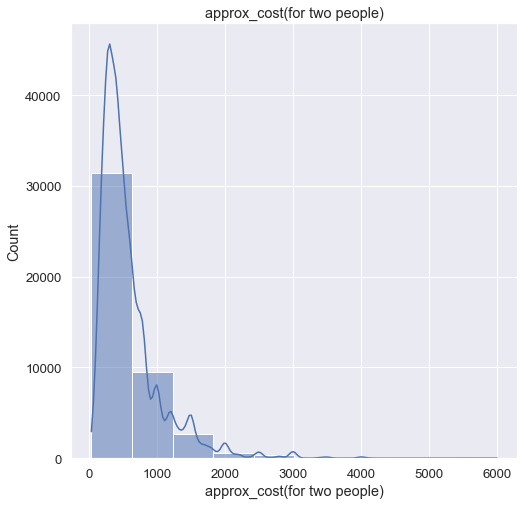

In [147]:
sns.histplot(data = data, x = 'approx_cost(for two people)', bins = 10, kde = True)
plt.title('approx_cost(for two people)')

Text(0.5, 1.0, 'NoOfDishLiked')

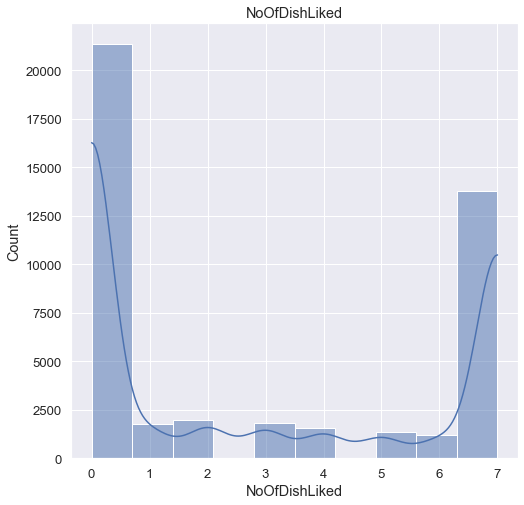

In [148]:
sns.histplot(data = data, x = 'NoOfDishLiked', bins = 10, kde = True)
plt.title('NoOfDishLiked')

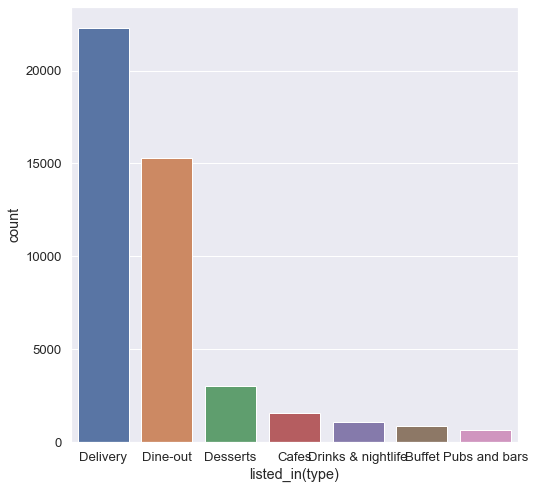

In [149]:
idx = data['listed_in(type)'].value_counts().index
sns.countplot(data = data, x = 'listed_in(type)' , order = idx)

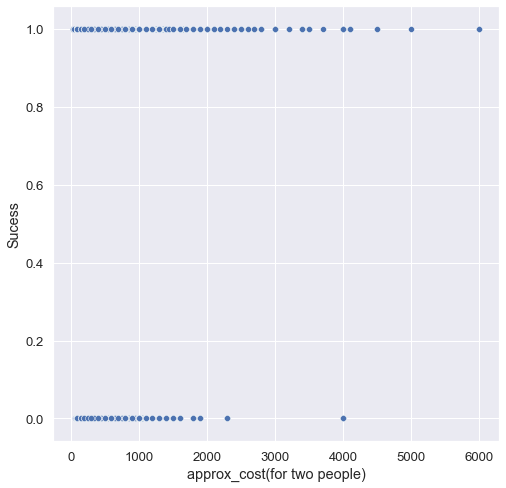

In [150]:
sns.scatterplot(data = data, x = 'approx_cost(for two people)', y = 'Sucess')

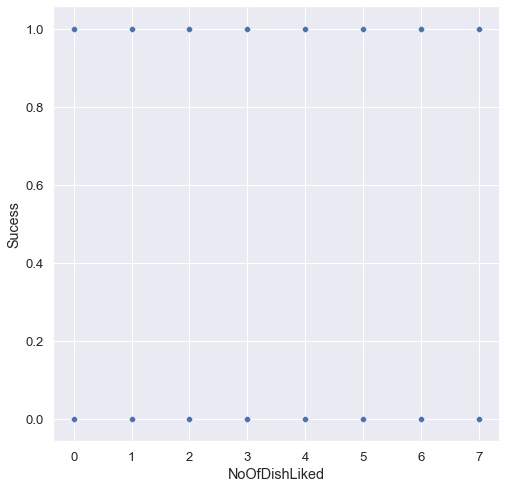

In [151]:
sns.scatterplot(data = data, x = 'NoOfDishLiked', y = 'Sucess')

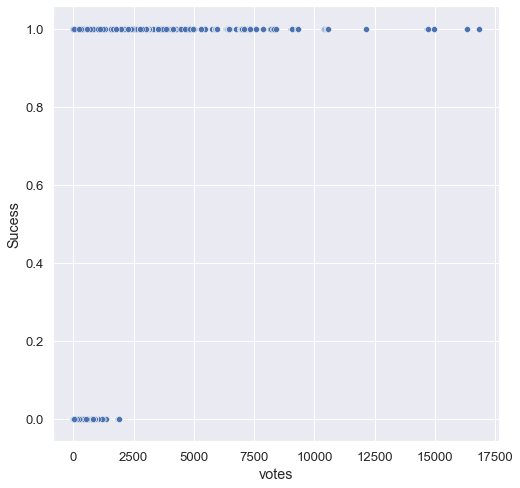

In [152]:
sns.scatterplot(data = data, x = 'votes', y = 'Sucess')

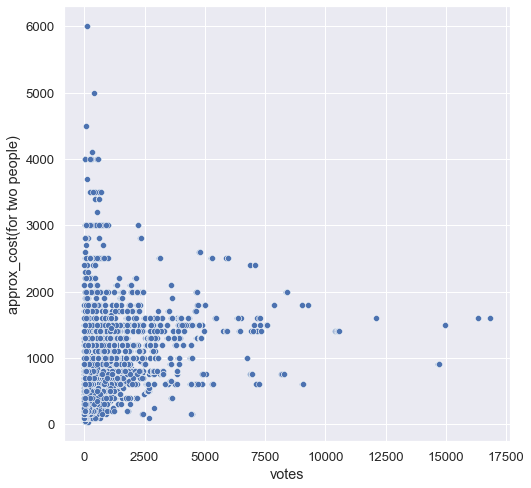

In [153]:
sns.scatterplot(data = data, x = 'votes', y = 'approx_cost(for two people)')

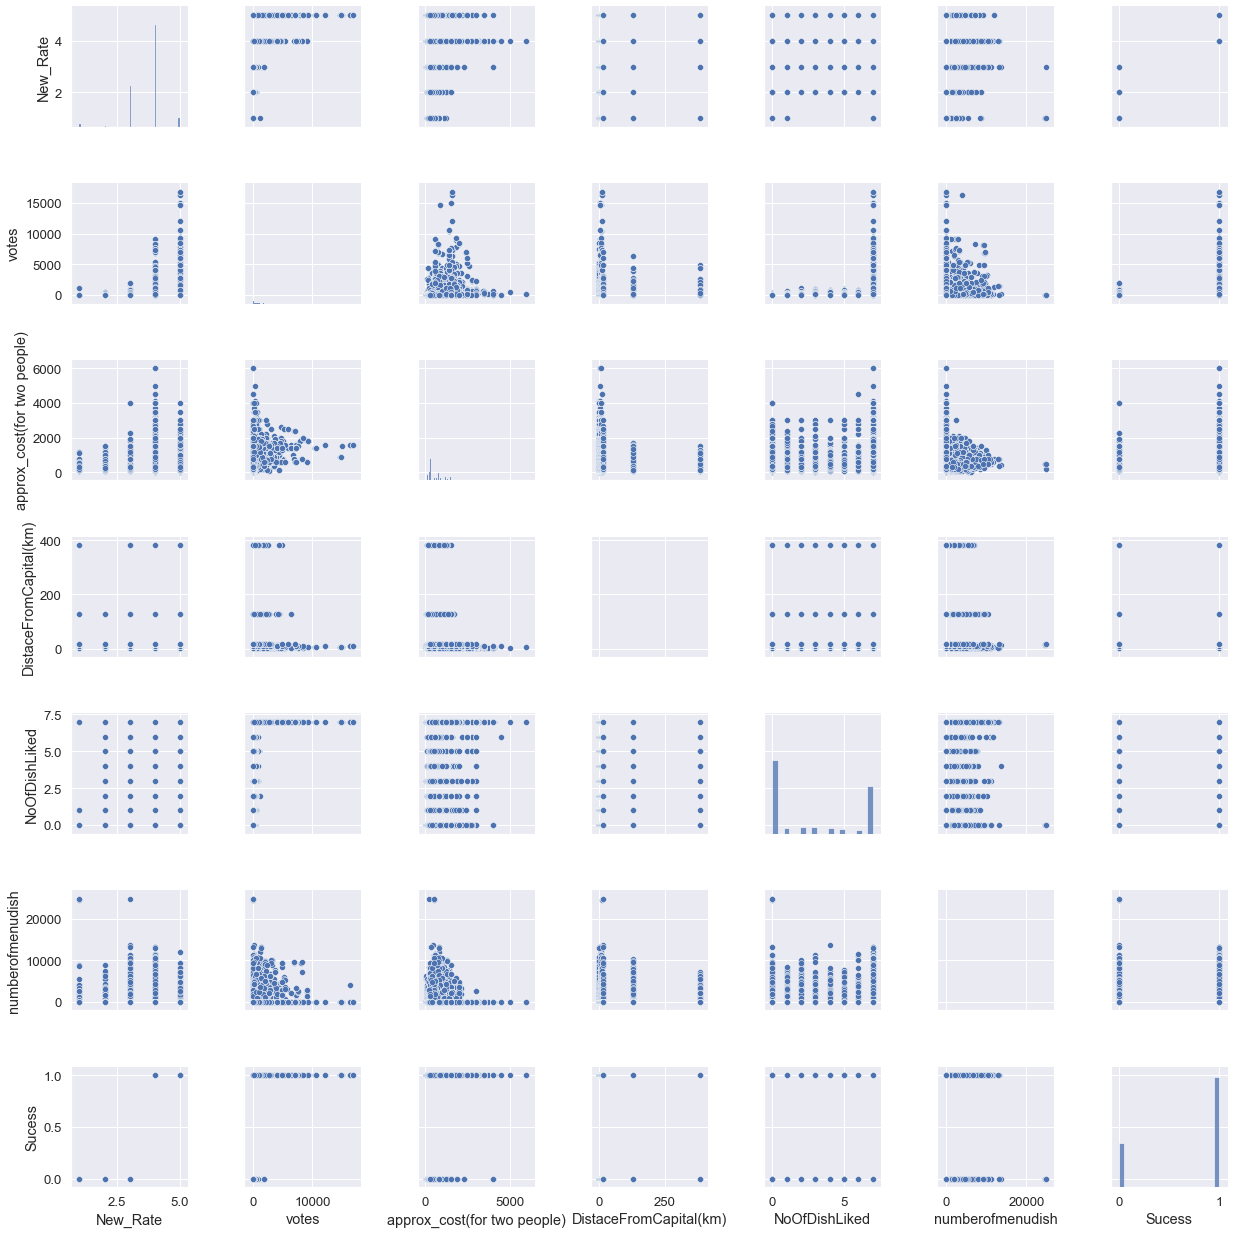

In [154]:
sns.pairplot(data)

In [155]:
data.head()

,name,online_order,New_Rate,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess
0,Jalsa,Yes,4,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,good place,382.0,Local Number,7,0,1
1,Spice Elephant,Yes,4,No,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,normal place,382.0,Local Number,7,0,1
2,San Churro Cafe,Yes,4,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,normal place,382.0,Country Number,7,0,1
3,Addhuri Udupi Bhojana,No,4,No,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,normal place,382.0,Country Number,1,0,1
4,Grand Village,No,4,No,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,good place,382.0,Country Number,2,0,1


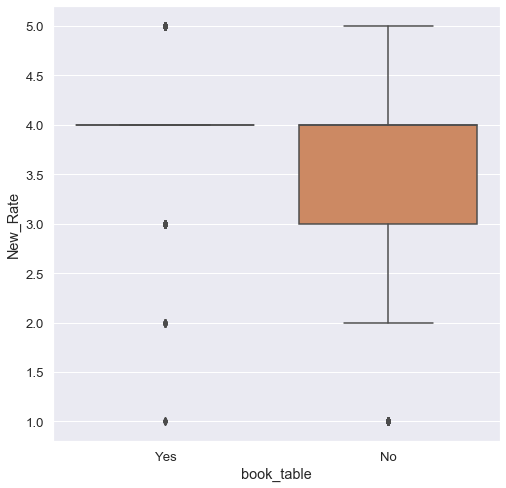

In [156]:
sns.boxplot(data = data, x = 'book_table', y = 'New_Rate')

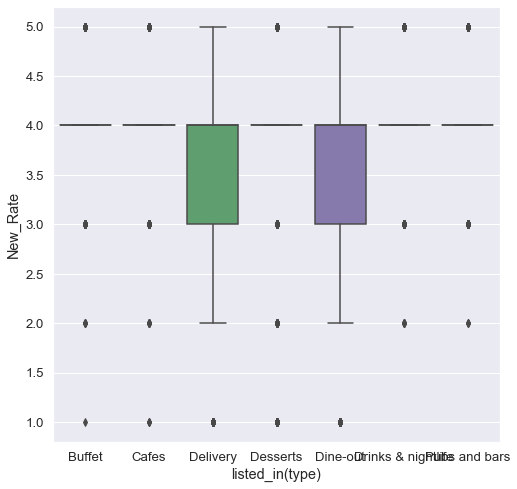

In [157]:
sns.boxplot(data = data, x = 'listed_in(type)', y = 'New_Rate')

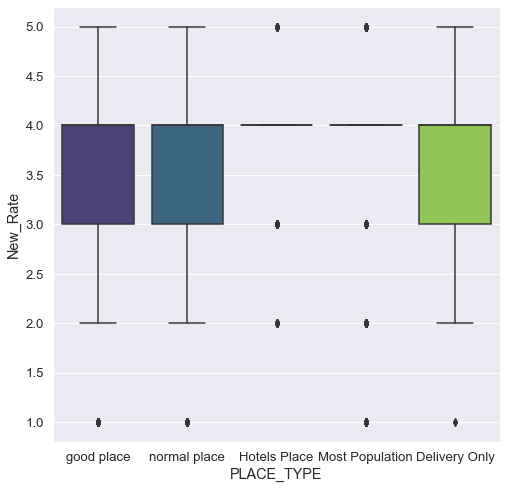

In [158]:
sns.boxplot(data = data, x = 'PLACE_TYPE', y = 'New_Rate' , palette='viridis')

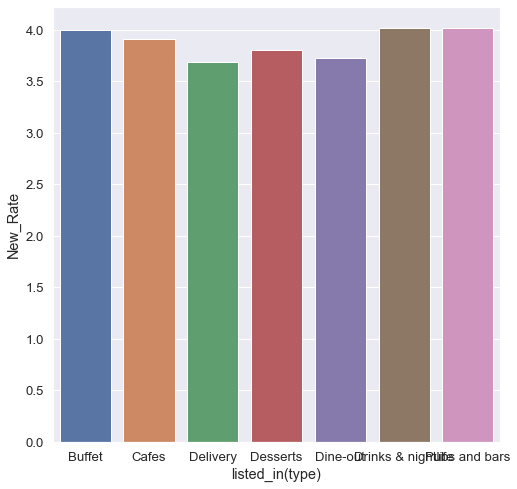

In [159]:
sns.barplot(data = data, x = 'listed_in(type)', y = 'New_Rate', ci = None)

# Data Prepration

In [160]:
data.columns

Index(['name', 'online_order', 'New_Rate', 'book_table', 'votes', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)', 'PLACE_TYPE', 'DistaceFromCapital(km)',
       'Phone Category', 'NoOfDishLiked', 'numberofmenudish', 'Sucess'],
      dtype='object')

In [161]:
data['PLACE_TYPE'].unique()

array(['good place', 'normal place', 'Hotels Place', 'Most Population',
       'Delivery Only'], dtype=object)

In [162]:
PlaceTypeMap = {'Most Population' : 5 , 
               'good place' : 4 , 
               'Delivery Only' : 3 , 
               'Hotels Place' : 2 ,
               'normal place' : 1}

In [163]:
PlaceTypeMap['normal place']

1

In [164]:
data['PLACE_TYPE'] = data['PLACE_TYPE'].map(PlaceTypeMap)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
data['PLACE_TYPE'].unique()

array([4, 1, 2, 5, 3], dtype=int64)

In [166]:
data['Phone Category'].unique()

array(['Local Number', 'Country Number', 'Wrong Number'], dtype=object)

In [167]:
PhoneCategoryMap = {'Country Number' : 3 , 
               'Local Number' : 2 , 
               'Wrong Number' : 1 ,}

In [168]:
data['Phone Category'] = data['Phone Category'].map(PhoneCategoryMap)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
df['Phone Category'].unique()

array(['Local Number', 'Country Number', 'Wrong Number'], dtype=object)

In [170]:
data.drop(columns = ['New_Rate'] , axis = 1 , inplace = True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
data.head()

,name,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess
0,Jalsa,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4,382.0,2,7,0,1
1,Spice Elephant,Yes,No,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,382.0,2,7,0,1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,382.0,3,7,0,1
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,1,382.0,3,1,0,1
4,Grand Village,No,No,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,4,382.0,3,2,0,1


In [192]:
EncodedFeatures = ['name' , 'rest_type' , 'cuisines' , 'listed_in(type)' , 'listed_in(city)']
data[EncodedFeatures].head()

,name,rest_type,cuisines,listed_in(type),listed_in(city)
0,Jalsa,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Spice Elephant,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari
2,San Churro Cafe,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari
3,Addhuri Udupi Bhojana,Quick Bites,"South Indian, North Indian",Buffet,Banashankari
4,Grand Village,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari


In [242]:
from sklearn.preprocessing import LabelEncoder
def ApplyEncoder(OriginalColumn) : 
    global data
    Encoder = LabelEncoder()
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [194]:
for col in EncodedFeatures : 
    data[f'Enc_{col}'] = ApplyEncoder(col)
# data.head()    

,name,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess,Enc_name,Enc_rest_type,Enc_cuisines,Enc_listed_in(type),Enc_listed_in(city),online_order_No,online_order_Yes,book_table_No,book_table_Yes
0,Jalsa,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4,382.0,2,7,0,1,3027,25,1977,0,1,0,1,0,1
1,Spice Elephant,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,382.0,2,7,0,1,5759,25,855,0,1,0,1,1,0
2,San Churro Cafe,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,382.0,3,7,0,1,5334,20,684,0,1,0,1,1,0
3,Addhuri Udupi Bhojana,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,1,382.0,3,1,0,1,155,74,2333,0,1,1,0,1,0
4,Grand Village,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,4,382.0,3,2,0,1,2444,25,2006,0,1,1,0,1,0


In [195]:
data= pd.get_dummies(data, columns = ['online_order', 'book_table'], drop_first=False)

KeyError: "None of [Index(['online_order', 'book_table'], dtype='object')] are in the [columns]"

In [196]:
data.head()

,name,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess,Enc_name,Enc_rest_type,Enc_cuisines,Enc_listed_in(type),Enc_listed_in(city),online_order_No,online_order_Yes,book_table_No,book_table_Yes
0,Jalsa,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4,382.0,2,7,0,1,3027,25,1977,0,1,0,1,0,1
1,Spice Elephant,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,382.0,2,7,0,1,5759,25,855,0,1,0,1,1,0
2,San Churro Cafe,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,382.0,3,7,0,1,5334,20,684,0,1,0,1,1,0
3,Addhuri Udupi Bhojana,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,1,382.0,3,1,0,1,155,74,2333,0,1,1,0,1,0
4,Grand Village,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,4,382.0,3,2,0,1,2444,25,2006,0,1,1,0,1,0


# Building Model 

In [215]:
X = data[['votes' , 'approx_cost(for two people)' , 'DistaceFromCapital(km)' , 'Phone Category' , 'NoOfDishLiked','Enc_name','Enc_rest_type','Enc_cuisines','Enc_listed_in(type)','Enc_listed_in(city)','online_order_No','online_order_Yes','book_table_No','book_table_Yes']]

In [216]:
Y = data['Sucess']

In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44774 entries, 0 to 44773
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   votes                        44774 non-null  int64  
 1   approx_cost(for two people)  44774 non-null  float64
 2   DistaceFromCapital(km)       44774 non-null  float64
 3   Phone Category               44774 non-null  int64  
 4   NoOfDishLiked                44774 non-null  int64  
 5   Enc_name                     44774 non-null  int32  
 6   Enc_rest_type                44774 non-null  int32  
 7   Enc_cuisines                 44774 non-null  int32  
 8   Enc_listed_in(type)          44774 non-null  int32  
 9   Enc_listed_in(city)          44774 non-null  int32  
 10  online_order_No              44774 non-null  uint8  
 11  online_order_Yes             44774 non-null  uint8  
 12  book_table_No                44774 non-null  uint8  
 13  book_table_Yes  

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.10 , random_state = 44 , shuffle = True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40296, 14), (4478, 14), (40296,), (4478,))

In [219]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [220]:
GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 

Models = [GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]

In [221]:
# ModelsScore = {}
# for Model in Models : 
#     print(f'for Model {str(Model).split("(")[0]}')
#     Model.fit(X_train, y_train)
#     print(f'Train Score is : {Model.score(X_train, y_train)}')
#     print(f'Test Score is : {Model.score(X_test, y_test)}')
#     y_pred = Model.predict(X_test)
#     ClassificationReport = classification_report(y_test,y_pred)
#     print('Classification Report is : \n', ClassificationReport )
#     print(f'Precision value is  : {ClassificationReport.split()[19]}')
#     print(f'Recall value is  : {ClassificationReport.split()[20]}')
#     print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
#     ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
#                                              ClassificationReport.split()[20],ClassificationReport.split()[21]]
#     print('=================================================')    


In [222]:
# ModelsScore

In [223]:
Model = KNNClassifierModel
Model.fit(X_train, y_train)
print(f'Train Score is : {Model.score(X_train,y_train)}')
print(f'Test Score is : {Model.score(X_test,y_test)}')
y_pred = Model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')

Train Score is : 0.9335666071074052
Test Score is : 0.8856632425189817
Classification Report is : 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1293
           1       0.91      0.93      0.92      3185

    accuracy                           0.89      4478
   macro avg       0.86      0.86      0.86      4478
weighted avg       0.88      0.89      0.89      4478

Precision value is  : 0.86
Recall value is  : 0.86
F1 Score value is  : 0.86


In [244]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [252]:
X_test.head()

,votes,approx_cost(for two people),DistaceFromCapital(km),Phone Category,NoOfDishLiked,Enc_name,Enc_rest_type,Enc_cuisines,Enc_listed_in(type),Enc_listed_in(city),online_order_No,online_order_Yes,book_table_No,book_table_Yes
32429,257,250.0,5.0,3,2,2695,74,400,4,15,0,1,1,0
13614,292,600.0,9.0,2,7,2813,25,297,0,24,0,1,1,0
35411,0,800.0,11.0,3,0,233,25,2338,2,18,1,0,1,0
7377,8,600.0,7.0,2,0,6165,37,1728,2,0,0,1,1,0
11123,158,1300.0,1.0,2,6,6564,25,885,4,23,0,1,1,0


In [243]:
# list(y_test)

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [226]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[1018  275]
 [ 237 2948]]


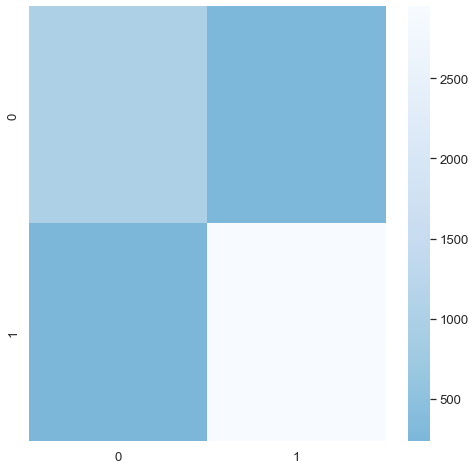

In [227]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [229]:
AllPredict = Model.predict(X)
ClassificationReport = classification_report(Y,AllPredict)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')

Classification Report is : 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     12769
           1       0.95      0.96      0.95     32005

    accuracy                           0.93     44774
   macro avg       0.92      0.91      0.91     44774
weighted avg       0.93      0.93      0.93     44774

Precision value is  : 0.92
Recall value is  : 0.91
F1 Score value is  : 0.91


In [230]:
data['Predicted Value'] = AllPredict
data.head(20)

,name,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess,Enc_name,Enc_rest_type,Enc_cuisines,Enc_listed_in(type),Enc_listed_in(city),online_order_No,online_order_Yes,book_table_No,book_table_Yes,Predicted Value
0,Jalsa,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4,382.0,2,7,0,1,3027,25,1977,0,1,0,1,0,1,1
1,Spice Elephant,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,382.0,2,7,0,1,5759,25,855,0,1,0,1,1,0,1
2,San Churro Cafe,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,382.0,3,7,0,1,5334,20,684,0,1,0,1,1,0,1
3,Addhuri Udupi Bhojana,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,1,382.0,3,1,0,1,155,74,2333,0,1,1,0,1,0,1
4,Grand Village,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,4,382.0,3,2,0,1,2444,25,2006,0,1,1,0,1,0,1
5,Timepass Dinner,286,Casual Dining,North Indian,600.0,Buffet,Banashankari,4,382.0,3,7,0,1,6745,25,1661,0,1,0,1,1,0,1
6,Rosewood International Hotel - Bar & Restaurant,8,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari,1,382.0,3,0,0,1,5148,25,2024,0,1,1,0,1,0,1
7,Onesta,2556,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes,Banashankari,1,382.0,2,7,0,1,4571,27,2123,1,1,0,1,0,1,1
8,Penthouse Cafe,324,Cafe,"Cafe, Italian, Continental",700.0,Cafes,Banashankari,4,382.0,3,7,0,1,4756,17,660,1,1,0,1,1,0,1
9,Smacznego,504,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes,Banashankari,4,382.0,3,7,0,1,5666,17,685,1,1,0,1,1,0,1


In [231]:
data[['Sucess','Predicted Value']].head(20)

,Sucess,Predicted Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [235]:
ValuesDict = {0:'Not Success',1:'Success'}
WrongIndices = []
WrongCounter = 0
Index = -1
for Actual,Predicted in zip(data['Sucess'].tolist(),data['Predicted Value'].tolist()) : 
    Index+=1
    if Actual != Predicted : 
        WrongCounter+=1
        WrongIndices.append(Index)
#         print(f'Wrong Prediction at Index {Index} predicted as {ValuesDict[Predicted]} while it should be {ValuesDict[Actual]}')
print(f'\n\n Total Wrong Predictions is {WrongCounter} out of total {data.shape[0]} with percentage {np.round(100*(data.shape[0]-WrongCounter)/data.shape[0],2)}%')        



 Total Wrong Predictions is 3189 out of total 44774 with percentage 92.88%


In [236]:
data.iloc[WrongIndices,:].head()

,name,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),PLACE_TYPE,DistaceFromCapital(km),Phone Category,NoOfDishLiked,numberofmenudish,Sucess,Enc_name,Enc_rest_type,Enc_cuisines,Enc_listed_in(type),Enc_listed_in(city),online_order_No,online_order_Yes,book_table_No,book_table_Yes,Predicted Value
15,Cafe Vivacity,90,Cafe,Cafe,650.0,Cafes,Banashankari,1,382.0,2,7,0,1,1148,17,502,1,1,0,1,1,0,0
21,Woodee Pizza,180,Cafe,"Cafe, Pizza, Fast Food, Beverages",500.0,Cafes,Banashankari,1,382.0,3,2,0,1,7100,17,700,1,1,0,1,1,0,0
31,Foodiction,506,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500.0,Delivery,Banashankari,4,382.0,3,7,0,0,2219,74,1908,2,1,0,1,1,0,1
36,Fast And Fresh,91,Quick Bites,"North Indian, Chinese, Fast Food",400.0,Delivery,Banashankari,4,382.0,3,0,0,0,2090,74,1779,2,1,0,1,1,0,1
45,Hotboxit,36,Delivery,"North Indian, Continental, Italian",400.0,Delivery,Banashankari,1,382.0,3,1,0,1,2663,37,1884,2,1,1,0,1,0,0


# Model Deployment

In [237]:
import joblib

In [238]:
joblib.dump(Model , 'model.h5')

['model.h5']

In [240]:
joblib.dump(Encoder , 'Encoder.h5')

NameError: name 'Encoder' is not defined

In [239]:
X.columns

Index(['votes', 'approx_cost(for two people)', 'DistaceFromCapital(km)',
       'Phone Category', 'NoOfDishLiked', 'Enc_name', 'Enc_rest_type',
       'Enc_cuisines', 'Enc_listed_in(type)', 'Enc_listed_in(city)',
       'online_order_No', 'online_order_Yes', 'book_table_No',
       'book_table_Yes'],
      dtype='object')